In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_csv(r"E:\data_science\project\ML_PROJECT\notebook\data\stud.csv")

In [104]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [105]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [106]:
df.duplicated().sum()

0

In [107]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [108]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [109]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [110]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [111]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [112]:
reading_full = df[df['reading_score'] == 100]['gender'].count()
writing_full = df[df['writing_score'] == 100]['gender'].count()
math_full = df[df['math_score'] == 100]['gender'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [113]:
reading_less_20 = df[df['reading_score'] <= 20]['gender'].count()
writing_less_20 = df[df['writing_score'] <= 20]['gender'].count()
math_less_20 = df[df['math_score'] <= 20]['gender'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [114]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


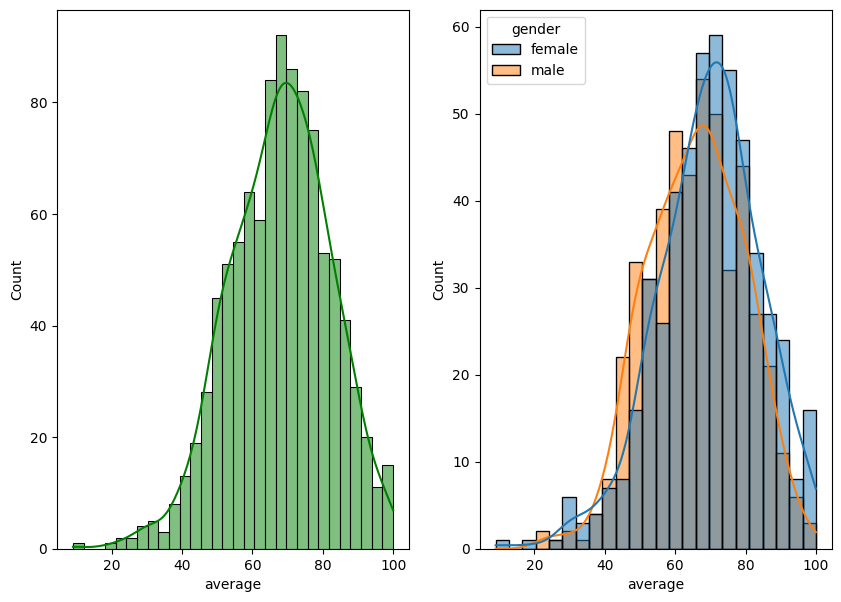

In [115]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

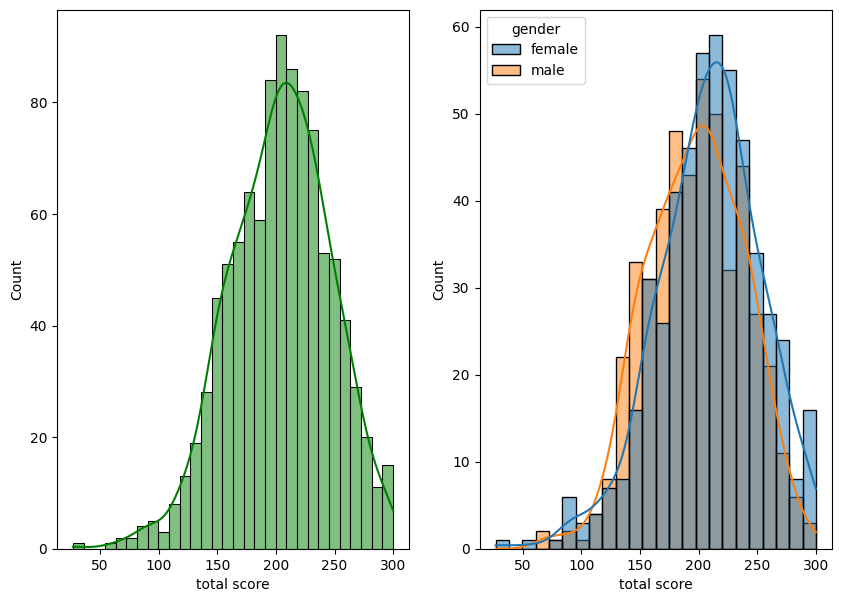

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

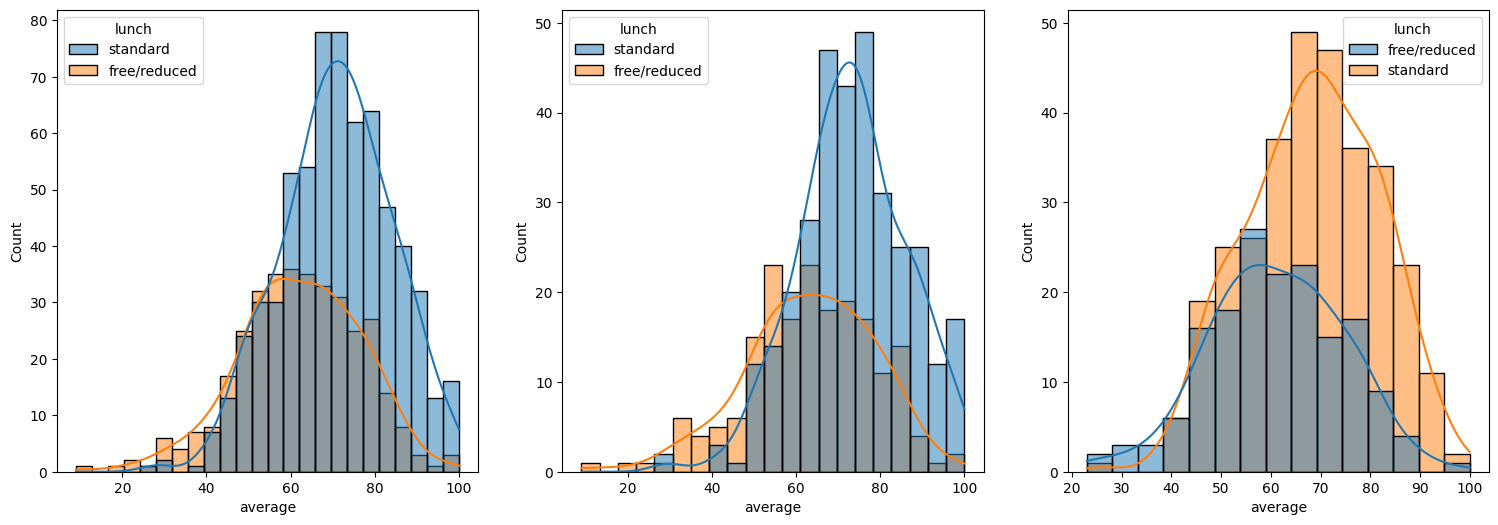

In [117]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

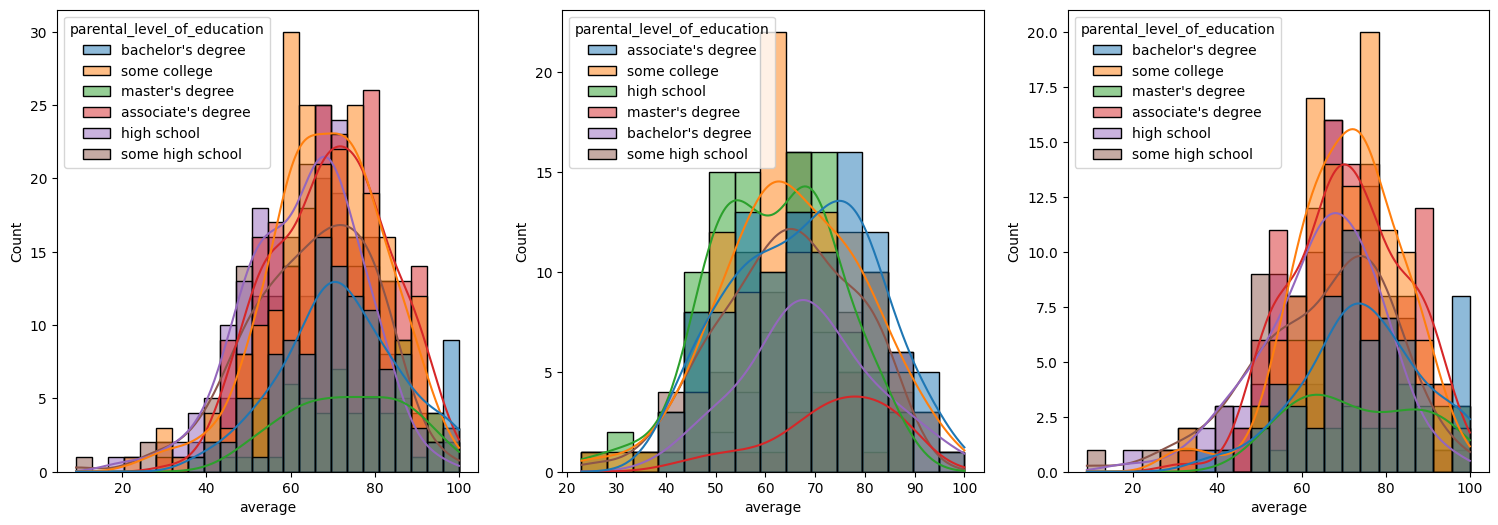

In [118]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

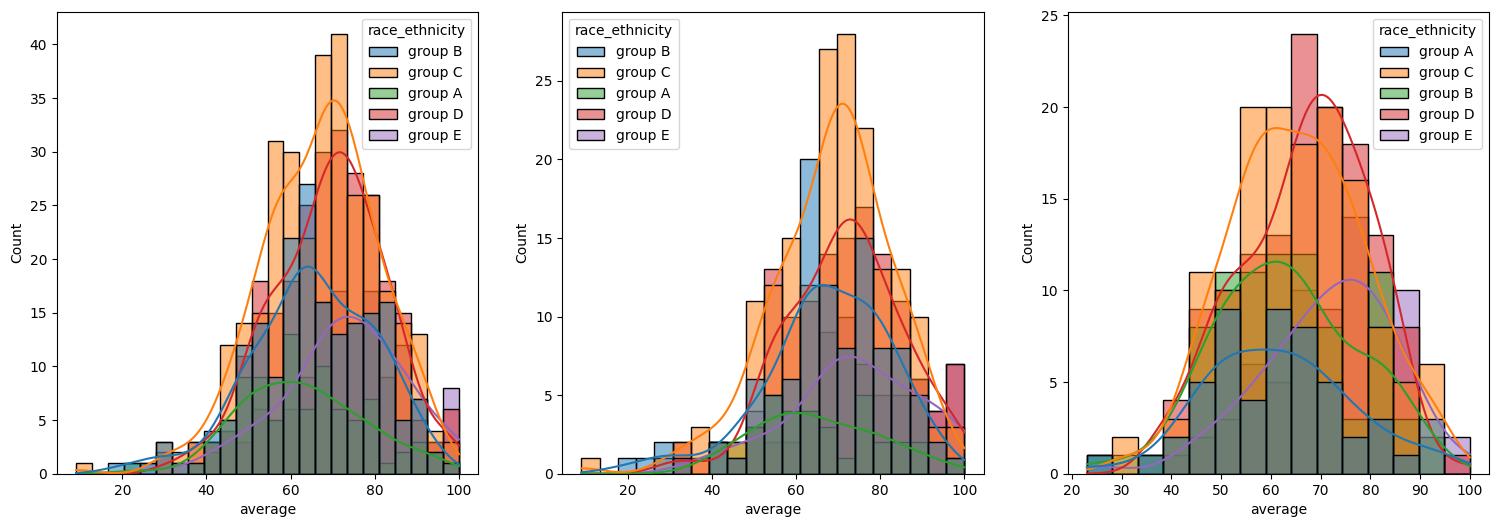

In [119]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

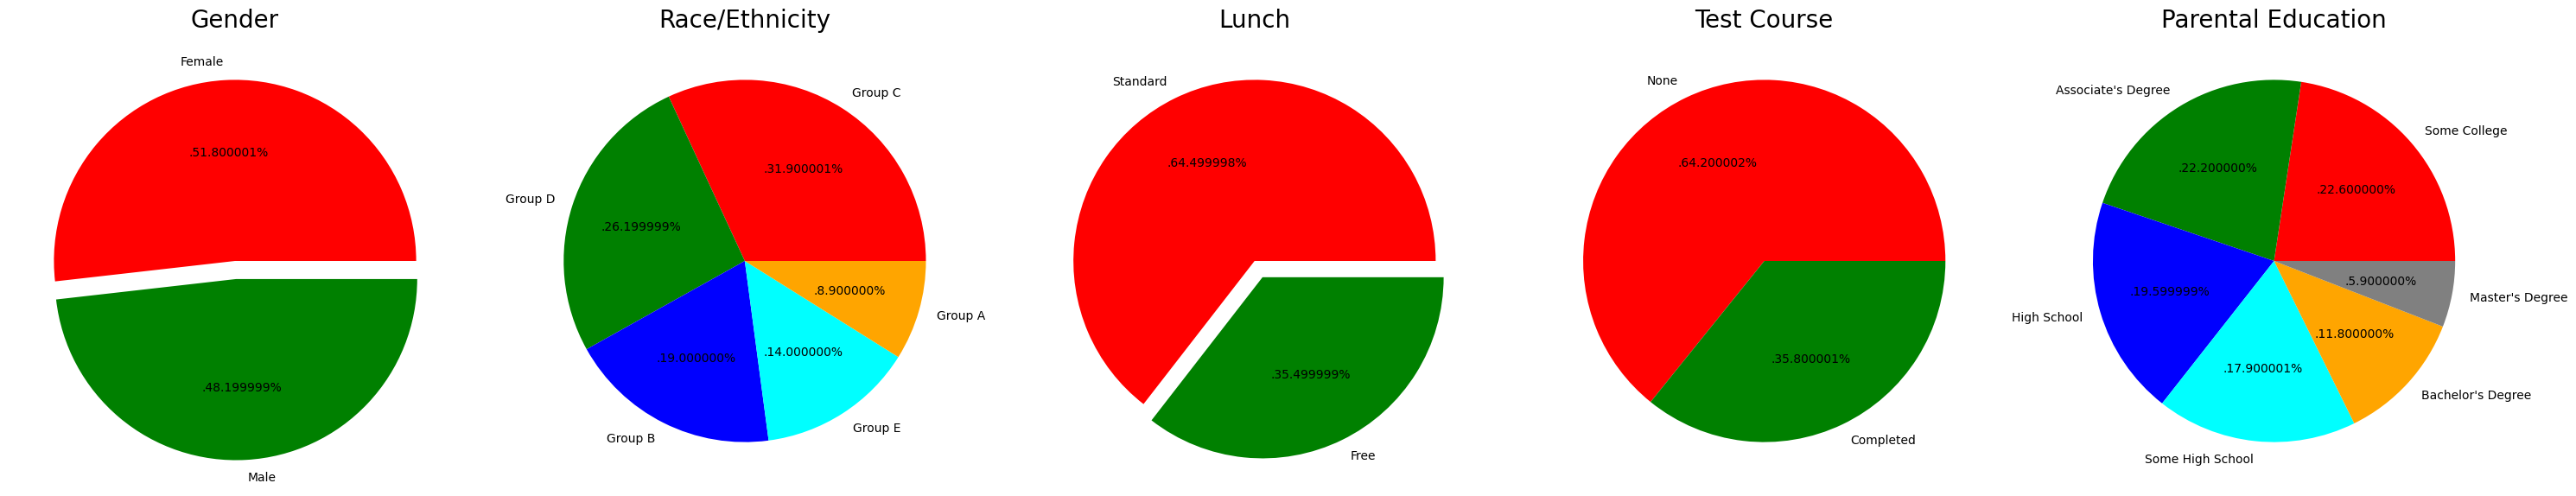

In [120]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels, explode=[0,0.1], autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, explode=[0,0.1], autopct ='.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

([<matplotlib.patches.Wedge at 0x2fa636ec4f0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

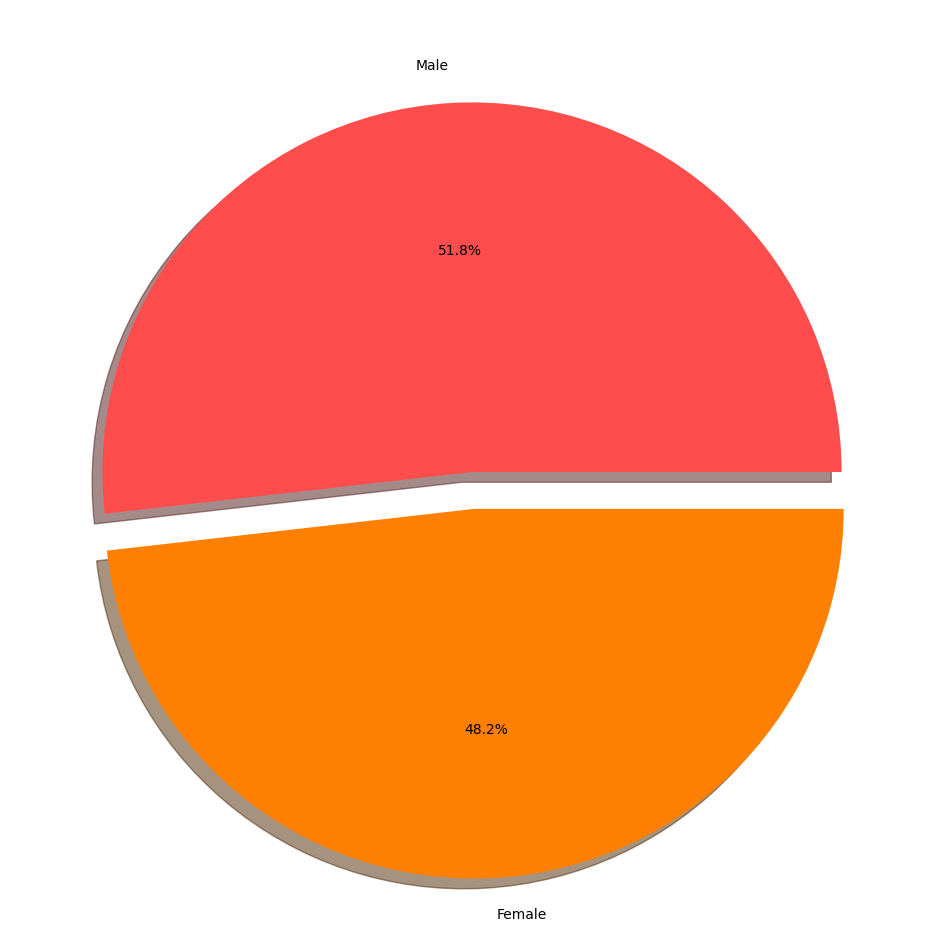

In [121]:

    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])


<Axes: xlabel='gender', ylabel='count'>

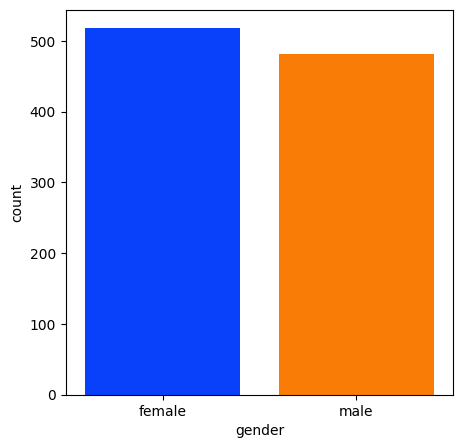

In [122]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)


to check missing values in the data

In [123]:
import plotly.express as px

In [124]:
fig = px.histogram(df, x="math_score", y="math_score", color="gender")
fig.show()



In [125]:
fig = px.histogram(df, x="math_score", y="math_score", color="gender", 
                   marginal="box") 
fig.show()

In [126]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


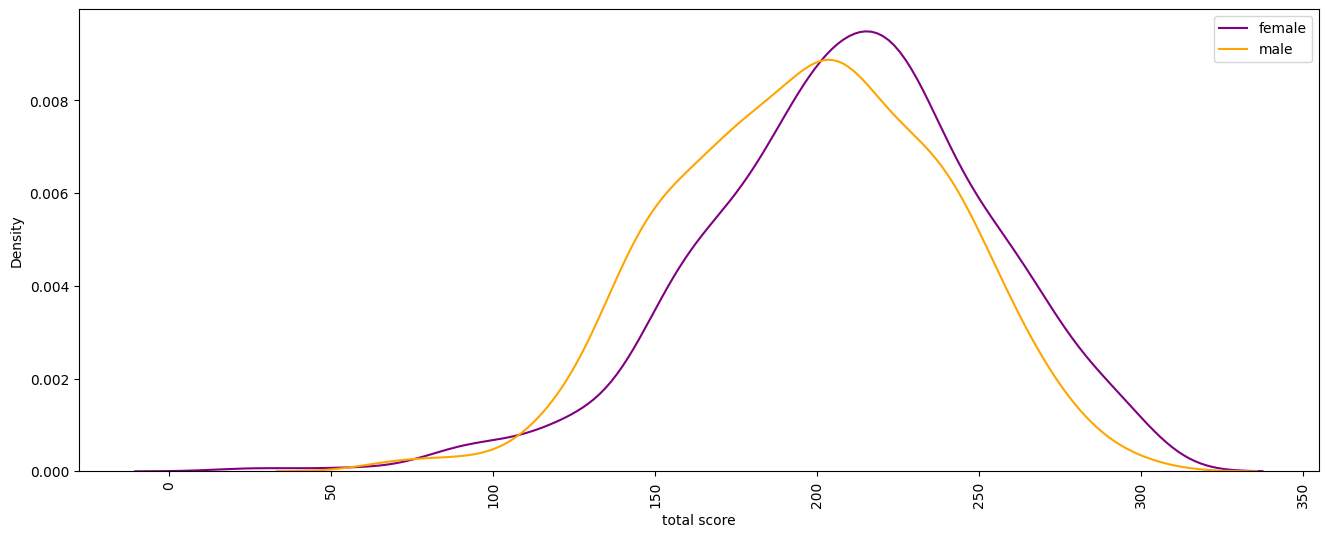

In [127]:
fig, ax = plt.subplots(1,1,figsize=(16, 6))
sns.kdeplot(df[df['gender']=='female']['total score'], color='purple', ax=ax, label='female')
sns.kdeplot(df[df['gender']=='male']['total score'], color='orange', ax=ax, label='male')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [128]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['parental_level_of_education'] = LE.fit_transform(df['parental_level_of_education'])

In [129]:
fig = px.scatter(df, x='writing_score', y='reading_score', 
                 color='parental_level_of_education',
                 size='parental_level_of_education',
                )
fig.show()

In [130]:
fig = px.scatter(df, x='writing_score', y='reading_score', 
                 color='gender',
                 size='parental_level_of_education',
                )
fig.show()

In [131]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,1,standard,none,72,72,74,218,72.666667
1,female,group C,4,standard,completed,69,90,88,247,82.333333
2,female,group B,3,standard,none,90,95,93,278,92.666667
3,male,group A,0,free/reduced,none,47,57,44,148,49.333333
4,male,group C,4,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,3,standard,completed,88,99,95,282,94.000000
996,male,group C,2,free/reduced,none,62,55,55,172,57.333333
997,female,group C,2,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,4,standard,completed,68,78,77,223,74.333333


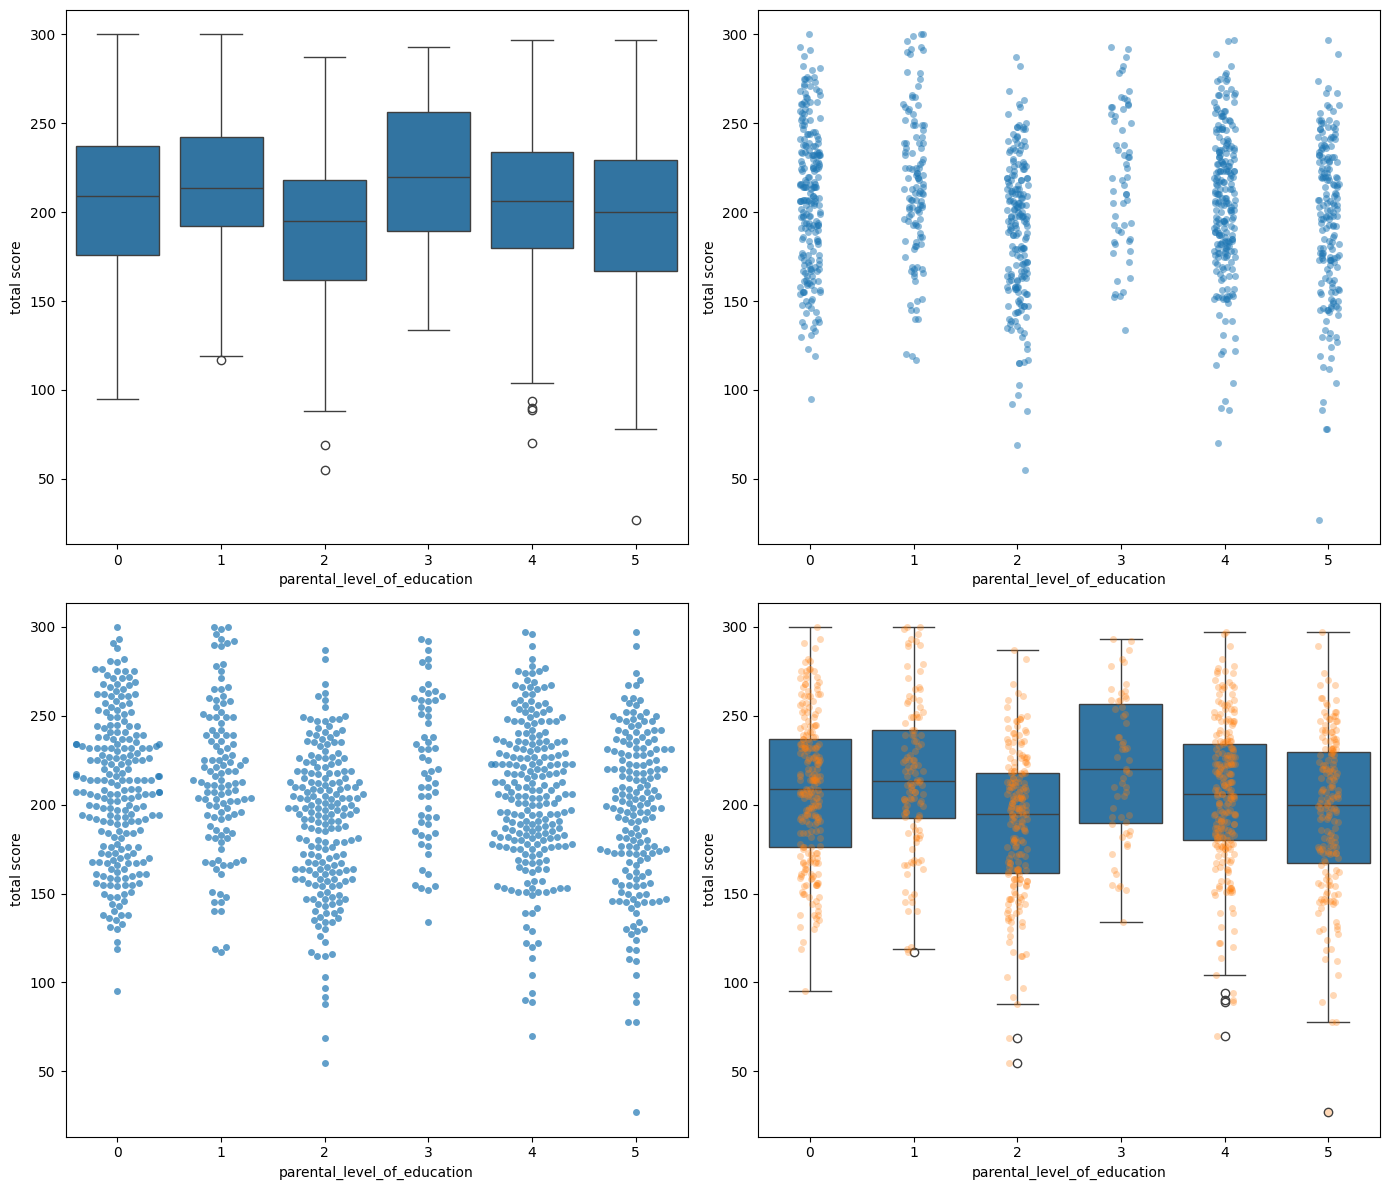

In [132]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# boxplot
sns.boxplot(x='parental_level_of_education', y='total score', data=df, ax=ax[0][0])

# stripplot
sns.stripplot(x='parental_level_of_education', y='total score', data=df, ax=ax[0][1], alpha=0.5)

# swarmplot 
sns.swarmplot(x='parental_level_of_education', y='total score', data=df, ax=ax[1][0], alpha=0.7)

# both
sns.boxplot(x='parental_level_of_education', y='total score', data=df, ax=ax[1][1])
sns.stripplot(x='parental_level_of_education', y='total score', data=df, ax=ax[1][1], alpha=0.3)

plt.tight_layout()
plt.show()


In [133]:
fig = px.box(df, x='parental_level_of_education', y='total score')
fig.show()

In [134]:
fig = px.box(df, x='parental_level_of_education', y='total score', points="all")
fig.show()

In [90]:
fig = px.box(df, x='parental_level_of_education', y='total score', color='gender', points="all")
fig.show()

In [135]:
fig = px.box(df, x='test_preparation_course', y='total score', color='gender', points="all")
fig.show()

In [136]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,1,standard,none,72,72,74,218,72.666667
1,female,group C,4,standard,completed,69,90,88,247,82.333333
2,female,group B,3,standard,none,90,95,93,278,92.666667
3,male,group A,0,free/reduced,none,47,57,44,148,49.333333
4,male,group C,4,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,3,standard,completed,88,99,95,282,94.000000
996,male,group C,2,free/reduced,none,62,55,55,172,57.333333
997,female,group C,2,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,4,standard,completed,68,78,77,223,74.333333


In [137]:
fig = px.box(df, x='lunch', y='total score', color='gender', points="all")
fig.show()

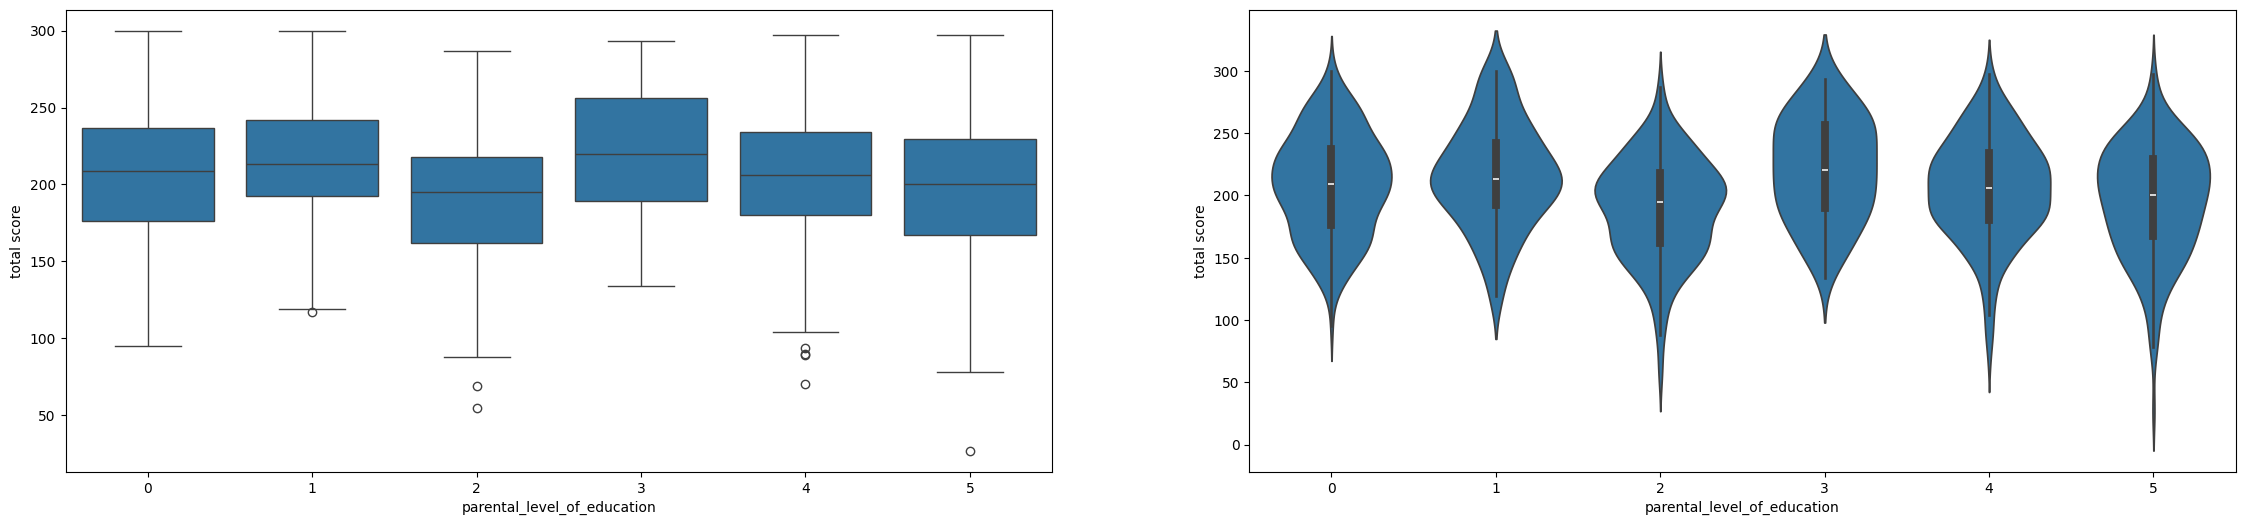

In [142]:


fig, ax = plt.subplots(1, 2, figsize=(28, 6))

# boxplot
sns.boxplot(x='parental_level_of_education', y='total score', data=df, ax=ax[0])

# violinplot
sns.violinplot(x='parental_level_of_education', y='total score', data=df, ax=ax[1])

plt.show()

In [143]:

fig = px.violin(df, x='parental_level_of_education', y='total score', 
                color='gender',
                violinmode='overlay'
            )
fig.show()

In [146]:
Gender=df["gender"].value_counts()

In [147]:
Gender

gender
female    518
male      482
Name: count, dtype: int64

In [148]:
y=df.groupby('gender')['total score'].mean()

In [149]:
y

gender
female    208.708494
male      197.512448
Name: total score, dtype: float64